In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression


In [2]:
# Read the csv file into a pandas DataFrame
pitchers = pd.read_csv('data/Merged_Data/pitchers_all_data.csv')
hitters = pd.read_csv('data/Merged_Data/hitters_all_data.csv')

# Three Year Model for Hitters

R2 Score: 0.61588457056406
 coef [[-4.13706298e-01 -5.71489329e+01  1.89377372e+01  2.71235756e+01
  -9.44357512e-02 -5.90220329e-02  5.56970343e-03  1.68649470e-02
   5.67955737e+01  1.22307748e+02  2.28475473e+01  3.45722507e+01
  -8.94084936e+01 -3.71192511e+01  3.03021322e+01  6.19734374e+00
   2.30886058e-01  6.21979289e-02 -4.37060177e-02 -2.38937028e-01
  -3.83014335e-02 -8.83241030e+01 -9.02973236e+01  6.23179185e+01
   9.42204888e-02 -2.60367182e-01  3.81053584e-01 -1.00566631e+02
   3.62265157e+01]]
 int [0.9946736]


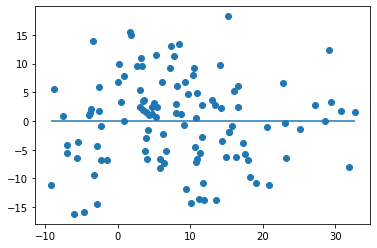

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     4.589
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           2.58e-08
Time:                        17:13:53   Log-Likelihood:                -388.14
No. Observations:                 113   AIC:                             836.3
Df Residuals:                      83   BIC:                             918.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9947     65.71

In [3]:
years =['2012','2013','2014', '2015', '2016']
model = LinearRegression()
Hitters_Nineteen = hitters.loc[ (hitters['season']==2019)]
Hitters_Nineteen= Hitters_Nineteen[['name','avg']]
for year in years:
    SeasonOne = hitters.loc[ (hitters['season']==int(year))]
    SeasonTwo = hitters.loc[ (hitters['season']==(int(year)+1))]
    SeasonThree = hitters.loc[ (hitters['season']==(int(year)+2))]
    RazzSeason = hitters.loc[ (hitters['season']==(int(year)+3))]

    SeasonOne = SeasonOne[["name", 'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    SeasonTwo = SeasonTwo[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    SeasonThree = SeasonThree[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    RazzSeason = RazzSeason[['razz_value','name']].dropna()
    RazzSeason = RazzSeason.merge(SeasonOne , on='name')
    RazzSeason = RazzSeason.merge(SeasonTwo , on='name')
    RazzSeason = RazzSeason.merge(SeasonThree , on='name')
    X= RazzSeason[['age_y','o_swingpercen_x', 'o_contactpercen_x',
        'ops_x', 'rbi_x', 'hr_x',
       'sb_x', 'pa_x', 'kpercen_x', 'bbpercen_x', 'iffbpercen_x',
       'o_swingpercen_y', 'o_contactpercen_y', 'z_swingpercen_y',
       'z_contactpercen_y', 'ops_y', 'r_y', 'rbi_y', 'hr_y', 'sb_y', 'pa_y',
       'kpercen_y', 'bbpercen_y',  'ops',
       'rbi', 'hr', 'sb',  'bbpercen', 'iffbpercen']]
    y= RazzSeason[['razz_value']].to_numpy()
    
    

    # Fitting our model with all of our features in X
    model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")
print(f" coef {model.coef_}")
print(f" int {model.intercept_}")
predictions = model.predict(X)
    # Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
    
predictions = model.predict(X)
RazzSeason['predictions']= predictions
RazzSeason['predictions_ranks'] =RazzSeason['predictions'].rank(ascending=False)
RazzSeason['razz_ranks'] =RazzSeason['razz_value'].rank(ascending=False)

RazzSeason= RazzSeason.merge(Hitters_Nineteen, on='name')
RazzSeason['adp_ranks'] = RazzSeason['avg'].rank(ascending=True)
RazzSeason['rating_diff']= ( RazzSeason['adp_ranks'] - RazzSeason['predictions_ranks'])
hitters_ranked = RazzSeason



In [4]:
### 3 years of data starting in 2018 to get X values

year = '2018'
SeasonOne = hitters.loc[ (hitters['season']==int(year))]
SeasonTwo = hitters.loc[ (hitters['season']==(int(year)+1))]
RazzSeason = hitters.loc[ (hitters['season']==(int(year)+2))]

SeasonOne = SeasonOne[["name", 'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
SeasonTwo = SeasonTwo[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
SeasonThree = SeasonThree[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]

RazzSeason = RazzSeason[['name']]

RazzSeason = RazzSeason.dropna()

RazzSeason = RazzSeason.merge(SeasonOne , on='name')
RazzSeason = RazzSeason.merge(SeasonTwo , on='name')
RazzSeason = RazzSeason.merge(SeasonThree , on='name')
X_test= RazzSeason[['age_y','o_swingpercen_x', 'o_contactpercen_x',
    'ops_x', 'rbi_x', 'hr_x',
   'sb_x', 'pa_x', 'kpercen_x', 'bbpercen_x', 'iffbpercen_x',
   'o_swingpercen_y', 'o_contactpercen_y', 'z_swingpercen_y',
   'z_contactpercen_y', 'ops_y', 'r_y', 'rbi_y', 'hr_y', 'sb_y', 'pa_y',
   'kpercen_y', 'bbpercen_y',  'ops',
   'rbi', 'hr', 'sb',  'bbpercen', 'iffbpercen']]


In [5]:
### Top 30 Hitters 3-year model
Twenty_One_Prediction = model.predict(X_test)
RazzSeason['predicted_val'] = Twenty_One_Prediction

RazzSeason['predictions_ranks'] =RazzSeason['predicted_val'].rank(ascending=False)
RazzSeason =RazzSeason.sort_values(by=['predictions_ranks'], ascending=True)
RazzSeason.head(30)

,name,age_x,o_swingpercen_x,o_contactpercen_x,z_swingpercen_x,z_contactpercen_x,ops_x,r_x,rbi_x,hr_x,...,r,rbi,hr,sb,pa,kpercen,bbpercen,iffbpercen,predicted_val,predictions_ranks
4,Mookie Betts,25,0.198,0.706,0.570,0.930,1.078,129,80,32,...,129,80,32,30,614,0.148,0.132,0.092,50.499456,1.0
12,Mike Trout,26,0.218,0.690,0.591,0.917,1.088,101,79,39,...,101,79,39,24,608,0.204,0.201,0.094,42.534956,2.0
44,Christian Yelich,26,0.277,0.622,0.646,0.881,1.000,118,110,36,...,118,110,36,22,651,0.207,0.104,0.049,34.061692,3.0
5,Trea Turner,25,0.266,0.677,0.650,0.884,0.760,103,73,19,...,103,73,19,43,740,0.178,0.093,0.128,32.514805,4.0
130,Aaron Judge,26,0.251,0.441,0.638,0.791,0.919,77,67,27,...,77,67,27,6,498,0.305,0.153,0.054,29.653375,5.0
126,Alex Bregman,24,0.200,0.791,0.605,0.928,0.926,105,103,31,...,105,103,31,10,705,0.121,0.136,0.126,29.625871,6.0
0,Jose Ramirez,25,0.223,0.794,0.623,0.921,0.939,110,105,39,...,110,105,39,34,698,0.115,0.152,0.130,28.659486,8.5
1,Jose Ramirez,25,0.223,0.794,0.623,0.921,0.939,110,105,39,...,110,105,39,34,698,0.115,0.152,0.130,28.659486,8.5
3,Jose Ramirez,25,0.223,0.794,0.623,0.921,0.939,110,105,39,...,110,105,39,34,698,0.115,0.152,0.130,28.659486,8.5
2,Jose Ramirez,25,0.223,0.794,0.623,0.921,0.939,110,105,39,...,110,105,39,34,698,0.115,0.152,0.130,28.659486,8.5


# Two Year Model for Hitters

R2 Score: 0.41220917757751097
 coef [[-8.27601280e-01 -4.56777280e+01 -1.31689020e+01  6.67135625e+01
   9.67364557e-03 -3.12868383e-01 -4.98603234e-02  1.24563753e-02
   6.09143384e+01 -6.60905980e+01 -9.94542916e+00  3.15239378e+01
  -9.66674009e+00 -7.22661626e+00 -1.35291327e+01 -8.18571341e+00
   1.02739352e-01  1.66677476e-01  1.43066390e-01  2.12874074e-01
  -2.11309343e-02 -7.11049111e+01]]
 int [16.83805336]


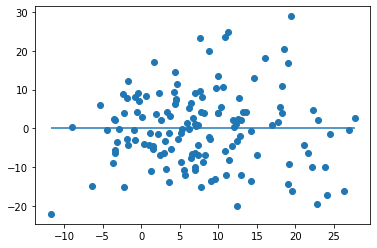

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     3.730
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           1.83e-06
Time:                        17:13:53   Log-Likelihood:                -515.53
No. Observations:                 140   AIC:                             1077.
Df Residuals:                     117   BIC:                             1145.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.8381     62.59

In [6]:
## Two Year Model
years =['2012','2013','2014', '2015', '2016']
model = LinearRegression()
Hitters_Nineteen = hitters.loc[ (hitters['season']==2019)]
Hitters_Nineteen= Hitters_Nineteen[['name','avg']]
for year in years:
    SeasonOne = hitters.loc[ (hitters['season']==int(year))]
    SeasonTwo = hitters.loc[ (hitters['season']==(int(year)+1))]

    RazzSeason = hitters.loc[ (hitters['season']==(int(year)+2))]

    SeasonOne = SeasonOne[["name", 'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    SeasonTwo = SeasonTwo[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    RazzSeason = RazzSeason[['razz_value','name']].dropna()
    RazzSeason = RazzSeason.merge(SeasonOne , on='name')
    RazzSeason = RazzSeason.merge(SeasonTwo , on='name')
    X= RazzSeason[['age_y','o_swingpercen_x', 'o_contactpercen_x',
        'ops_x', 'rbi_x', 'hr_x',
       'sb_x', 'pa_x', 'kpercen_x', 'bbpercen_x', 'iffbpercen_x',
       'o_swingpercen_y', 'o_contactpercen_y', 'z_swingpercen_y',
       'z_contactpercen_y', 'ops_y', 'r_y', 'rbi_y', 'hr_y', 'sb_y', 'pa_y',
       'kpercen_y']]
    y= RazzSeason[['razz_value']].to_numpy()
    
    

    # Fitting our model with all of our features in X
    model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")
print(f" coef {model.coef_}")
print(f" int {model.intercept_}")
predictions = model.predict(X)
    # Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
    
predictions = model.predict(X)
RazzSeason['predictions']= predictions
RazzSeason['predictions_ranks'] =RazzSeason['predictions'].rank(ascending=False)
RazzSeason['razz_ranks'] =RazzSeason['razz_value'].rank(ascending=False)

RazzSeason= RazzSeason.merge(Hitters_Nineteen, on='name')
RazzSeason['adp_ranks'] = RazzSeason['avg'].rank(ascending=True)
RazzSeason['rating_diff']= ( RazzSeason['adp_ranks'] - RazzSeason['predictions_ranks'])
hitters_ranked = RazzSeason



In [7]:
### Top 30 Hitters 2-year model Test
year = '2019'
SeasonOne = hitters.loc[ (hitters['season']==int(year))]
RazzSeason = hitters.loc[ (hitters['season']==(int(year)+1))]


SeasonOne = SeasonOne[["name", 'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
RazzSeason = RazzSeason[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]



RazzSeason = RazzSeason.merge(SeasonOne , on='name')
X_test= RazzSeason[['age_y','o_swingpercen_x', 'o_contactpercen_x',
    'ops_x', 'rbi_x', 'hr_x',
   'sb_x', 'pa_x', 'kpercen_x', 'bbpercen_x', 'iffbpercen_x',
   'o_swingpercen_y', 'o_contactpercen_y', 'z_swingpercen_y',
   'z_contactpercen_y', 'ops_y', 'r_y', 'rbi_y', 'hr_y', 'sb_y', 'pa_y',
   'kpercen_y']]


In [8]:
### Top 30 Hitters 2-year model
Twenty_One_Prediction = model.predict(X_test)
RazzSeason['predicted_val'] = Twenty_One_Prediction

RazzSeason['predictions_ranks'] =RazzSeason['predicted_val'].rank(ascending=False)
RazzSeason =RazzSeason.sort_values(by=['predictions_ranks'], ascending=True)
RazzSeason.head(30)

,name,age_x,o_swingpercen_x,o_contactpercen_x,z_swingpercen_x,z_contactpercen_x,ops_x,r_x,rbi_x,hr_x,...,r_y,rbi_y,hr_y,sb_y,pa_y,kpercen_y,bbpercen_y,iffbpercen_y,predicted_val,predictions_ranks
14,Juan Soto,21,0.210,0.697,0.614,0.889,1.185,39,37,13,...,110,110,34,12,659,0.200,0.164,0.046,39.184302,1.0
17,Ronald Acuna Jr.,22,0.235,0.650,0.657,0.746,0.987,46,29,14,...,127,101,41,37,715,0.263,0.106,0.048,37.903056,2.0
11,Mike Trout,28,0.174,0.680,0.599,0.874,0.993,41,46,17,...,110,104,45,11,600,0.200,0.183,0.098,30.645552,3.0
7,Freddie Freeman,30,0.282,0.747,0.807,0.860,1.102,51,53,13,...,113,121,38,6,692,0.184,0.126,0.043,29.969821,4.0
36,Rafael Devers,23,0.423,0.650,0.751,0.756,0.793,32,43,11,...,129,115,32,8,702,0.170,0.068,0.099,29.617466,5.0
52,Christian Yelich,28,0.203,0.455,0.601,0.819,0.786,39,22,12,...,100,97,44,30,580,0.203,0.138,0.075,28.137888,6.0
9,Marcell Ozuna,29,0.325,0.539,0.690,0.836,1.067,38,56,18,...,80,89,29,12,549,0.208,0.113,0.099,27.902452,7.0
141,Matt Chapman,27,0.269,0.495,0.666,0.744,0.812,22,25,10,...,102,91,36,1,670,0.219,0.109,0.175,25.025450,8.0
28,Michael Conforto,27,0.277,0.578,0.686,0.868,0.927,40,31,9,...,90,92,33,7,648,0.230,0.130,0.075,24.450904,9.0
5,Jose Abreu,33,0.364,0.589,0.681,0.824,0.987,43,60,19,...,85,123,33,2,693,0.219,0.052,0.089,24.184433,10.0


# Top 30 Pitchers 3-year model

R2 Score: 0.9142946481079799
R2 Score: 0.9333087606010227
R2 Score: 0.8888060257985204
R2 Score: 0.7789902167313947
R2 Score: 0.8177695923940833
 coef [[ 7.03797232e+00 -5.56246620e+01  6.24066354e-01 -8.59545185e-01
  -8.71371335e-01  1.11747715e+01 -4.65172020e-01  1.39825846e+00
   3.95852968e-01  2.55361558e+00 -6.03749856e-01  1.42087980e+01
  -4.34043350e+01 -1.16513403e+02 -1.78641228e+00  5.66707116e-01
  -2.68410809e+00 -4.50612609e-01  1.06517578e-01  7.53610908e-01
   1.14591078e+00 -1.46629803e+01  8.74841092e-01 -2.08658819e+00
  -4.25519076e-01  1.29430443e+00 -1.48465597e+00 -6.30749815e+00
   5.41196071e+01  2.29951506e+01 -2.13217991e+00  1.63942206e+01
  -1.38963509e+00  5.45398742e-01  2.73216469e-01 -8.06773364e-01
  -5.69793380e-01  2.03429033e-01 -5.33615516e+00  6.59227340e-02
  -1.14031719e+00 -6.24967086e-02 -5.18038586e-01  8.81931726e-02
  -1.13799451e+01  3.25158605e+01  1.39476768e+02]]
 int [-4.96637876]


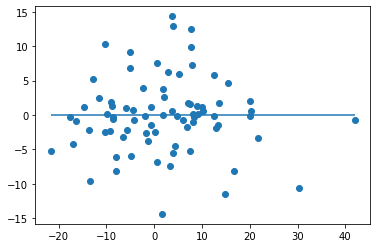

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2.864
Date:                Mon, 15 Mar 2021   Prob (F-statistic):            0.00152
Time:                        17:13:54   Log-Likelihood:                -241.82
No. Observations:                  78   AIC:                             579.6
Df Residuals:                      30   BIC:                             692.8
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9664     99.635     -0.050      0.9

In [9]:
years =['2012','2013','2014', '2015', '2016']
model = LinearRegression()

for year in years:
    SeasonOne = pitchers.loc[ (pitchers['season']==int(year))]
    SeasonTwo = pitchers.loc[ (pitchers['season']==(int(year)+1))]
    SeasonThree = pitchers.loc[ (pitchers['season']==(int(year)+2))]
    RazzSeason = pitchers.loc[ (pitchers['season']==(int(year)+3))]

    SeasonOne = SeasonOne[['era', 'whip','bbpercen','name', 'w','l', 'so', 'sv','hld','age','war', 'g','ip', 'hr', 'bb', 'ibb', 'hbp', 'babip','xfip','gbpercen', 'fbpercen' ]]
    SeasonTwo = SeasonTwo[['era', 'whip','bbpercen','name', 'w','l', 'so', 'sv','hld','age','war', 'g','ip', 'hr', 'bb', 'ibb', 'hbp', 'babip','xfip','gbpercen', 'fbpercen' ]]
    SeasonThree = SeasonThree[['era', 'whip','bbpercen','name', 'w','l', 'so', 'sv','hld','age','war', 'g','ip', 'hr', 'bb', 'ibb', 'hbp', 'babip','xfip','gbpercen', 'fbpercen' ]]

    RazzSeason = RazzSeason[['razz_value','name']].dropna()
    RazzSeason = RazzSeason.merge(SeasonOne , on='name')
    RazzSeason = RazzSeason.merge(SeasonTwo , on='name')
    RazzSeason = RazzSeason.merge(SeasonThree , on='name')
    X= RazzSeason[['era_x', 'whip_x', 'w_x', 'l_x',
         'hld_x', 'war_x', 'ip_x', 'hr_x',
       'bb_x', 'ibb_x', 'hbp_x', 'xfip_x', 'gbpercen_x',
       'fbpercen_x', 'era_y', 'whip_y', 'w_y', 'l_y', 'so_y',
       'sv_y', 'hld_y', 'war_y', 'ip_y', 'hr_y', 'bb_y',
       'ibb_y', 'hbp_y', 'xfip_y', 'gbpercen_y', 'fbpercen_y',
       'era', 'whip', 'w', 'l', 'so', 'sv', 'hld', 'age', 'war',
        'ip', 'hr', 'bb', 'ibb', 'hbp', 'xfip', 'gbpercen',
       'fbpercen']]
    y= RazzSeason[['razz_value']].to_numpy()
    
    

    # Fitting our model with all of our features in X
    model.fit(X, y)
    ## used as reference: https://stackoverflow.com/questions/56039406/how-can-i-display-the-weights-and-bias-from-linearregression

    score = model.score(X, y)
    print(f"R2 Score: {score}")
print(f" coef {model.coef_}")
print(f" int {model.intercept_}")
predictions = model.predict(X)
# Plot Residuals


plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
predictions = model.predict(X)
RazzSeason['predictions']= predictions
RazzSeason['predictions_ranks'] =RazzSeason['predictions'].rank(ascending=False)
RazzSeason['razz_ranks'] =RazzSeason['razz_value'].rank(ascending=False)



In [10]:
### 3 years of data starting in 2018 to get X values

year = '2018'
SeasonOne = pitchers.loc[ (pitchers['season']==int(year))]
SeasonTwo = pitchers.loc[ (pitchers['season']==(int(year)+1))]
SeasonThree = pitchers.loc[ (pitchers['season']==(int(year)+2))]


SeasonOne = SeasonOne[['era', 'whip','bbpercen','name', 'w','l', 'so', 'sv','hld','age','war', 'g','ip', 'hr', 'bb', 'ibb', 'hbp', 'babip','xfip','gbpercen', 'fbpercen' ]]
SeasonTwo = SeasonTwo[['era', 'whip','bbpercen','name', 'w','l', 'so', 'sv','hld','age','war', 'g','ip', 'hr', 'bb', 'ibb', 'hbp', 'babip','xfip','gbpercen', 'fbpercen' ]]
RazzSeason = SeasonThree[['era', 'whip','bbpercen','name', 'w','l', 'so', 'sv','hld','age','war', 'g','ip', 'hr', 'bb', 'ibb', 'hbp', 'babip','xfip','gbpercen', 'fbpercen' ]]

RazzSeason = RazzSeason.merge(SeasonOne , on='name')
RazzSeason = RazzSeason.merge(SeasonTwo , on='name')
X= RazzSeason[['era_x', 'whip_x', 'w_x', 'l_x',
     'hld_x', 'war_x', 'ip_x', 'hr_x',
   'bb_x', 'ibb_x', 'hbp_x', 'xfip_x', 'gbpercen_x',
   'fbpercen_x', 'era_y', 'whip_y', 'w_y', 'l_y', 'so_y',
   'sv_y', 'hld_y', 'war_y', 'ip_y', 'hr_y', 'bb_y',
   'ibb_y', 'hbp_y', 'xfip_y', 'gbpercen_y', 'fbpercen_y',
   'era', 'whip', 'w', 'l', 'so', 'sv', 'hld', 'age', 'war',
    'ip', 'hr', 'bb', 'ibb', 'hbp', 'xfip', 'gbpercen',
   'fbpercen']]

In [12]:
### Top 30 Pitchers 3-year model
Twenty_One_Prediction = model.predict(X)
RazzSeason['predicted_val'] = Twenty_One_Prediction

RazzSeason['predictions_ranks'] =RazzSeason['predicted_val'].rank(ascending=False)
RazzSeason =RazzSeason.sort_values(by=['predictions_ranks'], ascending=True)
RazzSeason.head(30)

,era_x,whip_x,bbpercen_x,name,w_x,l_x,so_x,sv_x,hld_x,age_x,...,hr,bb,ibb,hbp,babip,xfip,gbpercen,fbpercen,predicted_val,predictions_ranks
70,10.05,1.76,0.107,Julio Teheran,0,4,20,0,0,29,...,22,83,3,14,0.266,5.26,0.390,0.404,54.869812,1.0
61,6.48,1.44,0.068,Madison Bumgarner,1,4,30,0,0,30,...,30,43,3,10,0.289,4.31,0.358,0.416,52.549693,2.0
17,4.08,1.13,0.092,Tyler Glasnow,5,1,91,0,0,26,...,4,14,0,0,0.265,2.94,0.504,0.338,42.643488,3.0
45,5.15,1.36,0.063,Seth Lugo,3,4,47,3,0,30,...,8,16,4,5,0.265,3.24,0.431,0.394,40.573625,4.0
54,5.84,1.50,0.082,Ross Stripling,3,3,40,1,0,30,...,11,20,0,2,0.299,3.58,0.502,0.307,31.145899,5.0
16,1.99,1.09,0.066,Dallas Keuchel,6,2,42,0,0,32,...,16,39,1,9,0.298,4.06,0.601,0.196,31.040825,6.0
37,3.44,0.95,0.075,Walker Buehler,1,0,42,0,0,25,...,20,37,0,7,0.290,3.37,0.427,0.348,30.680828,7.0
53,4.66,1.57,0.061,Patrick Corbin,2,7,60,0,0,30,...,24,70,2,3,0.290,3.59,0.495,0.326,28.137327,8.0
4,2.38,0.96,0.067,Jacob deGrom,4,2,104,0,0,32,...,19,44,1,7,0.282,3.11,0.444,0.346,26.859542,9.0
38,4.91,1.21,0.094,Jack Flaherty,4,3,49,0,0,24,...,25,55,2,7,0.242,3.64,0.395,0.383,26.299872,10.0
